In [1]:
#Imports
import pandas as pd
import prepare as p
import explore as e
import model as m
import dev_wrangle as w

# Acquire

In [2]:
df= pd.read_json('data2.json')

# Prepare

In [3]:
df = w.prepare_df(df)

# Explore

In [4]:
train, val, test = w.train_val_test(df, stratify= 'language')

#### 1. What are the most common words in READMEs?

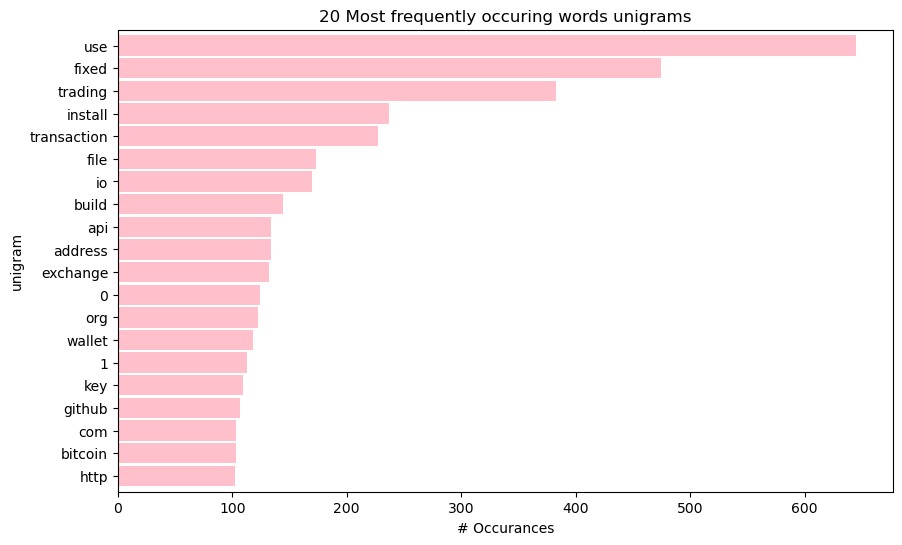

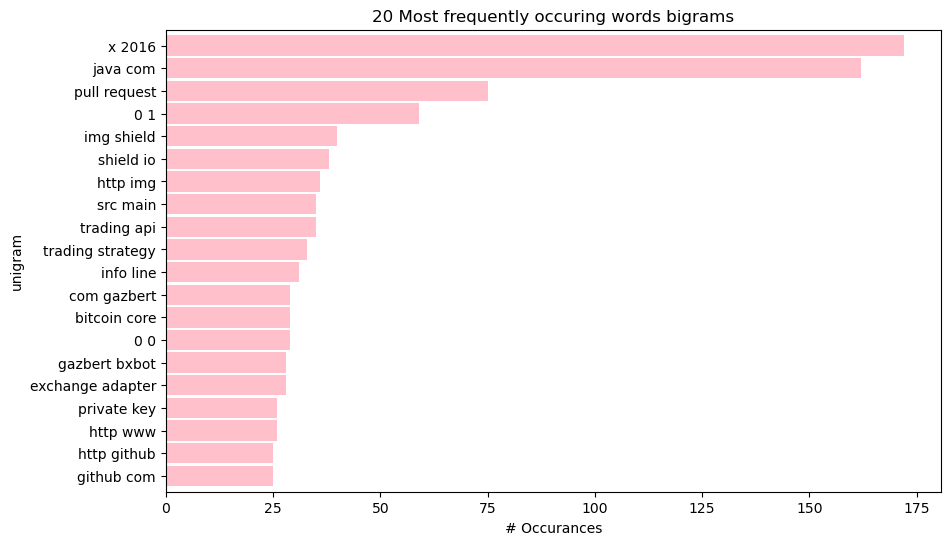

In [5]:
e.Q1(train)

#### Takeaway

#### 2. Does the length of the README vary by programming language?

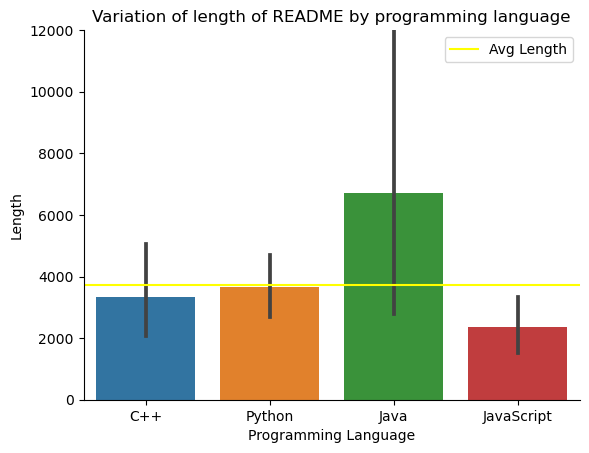

In [6]:
e.Q2(train)

#### Takeaway

#### 3. Do different programming languages use a different number of unique words?

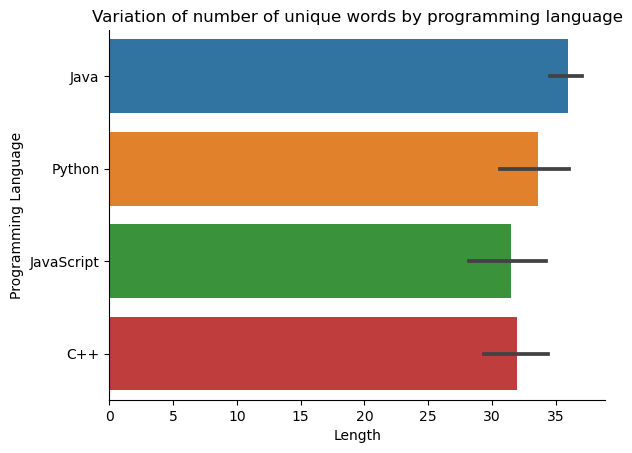

In [7]:
e.Q3(train)

#### Takeaway

# Model

In [8]:
#split data
X_train, y_train, X_val, y_val, X_test, y_test = w.x_y_split(df, 'language')

In [9]:
m.get_baseline_accuracy(y_train)

Baseline accuracy: 0.391304347826087


In [10]:
X_train_tfid, X_val_tfid, X_test_tfid = m.get_tfid(X_train, X_val, X_test, y_train, y_val, y_test)

In [11]:
df_1 = m.decision_tree(X_train_tfid, X_val_tfid, y_train, y_val)
df_1.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,max_depth,train_accuracy,validate_accuracy,difference
8,9,0.985507,0.826087,0.159420
3,4,0.782609,0.782609,0.000000
4,5,0.840580,0.782609,0.057971
5,6,0.898551,0.782609,0.115942
7,8,0.971014,0.782609,0.188406
1,2,0.681159,0.739130,-0.057971
2,3,0.710145,0.739130,-0.028986
6,7,0.927536,0.739130,0.188406
0,1,0.550725,0.695652,-0.144928


In [12]:
df_2 = m.random_forest_tree(X_train_tfid, X_val_tfid, y_train, y_val)
df_2.sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True]).head(10)

,min_samples_leaf,train_accuracy,validate_accuracy,difference
2,3,0.927536,0.782609,0.144928
4,5,0.782609,0.695652,0.086957
3,4,0.869565,0.695652,0.173913
1,2,0.985507,0.695652,0.289855
0,1,1.000000,0.695652,0.304348
7,8,0.478261,0.608696,-0.130435
6,7,0.507246,0.608696,-0.101449
5,6,0.695652,0.608696,0.086957
9,10,0.391304,0.565217,-0.173913
10,11,0.391304,0.565217,-0.173913


In [13]:
df_3 = m.logistic_regression(X_train_tfid, X_val_tfid, y_train, y_val)
df_3

,model,train_accuracy,validate_accuracy,difference
0,"LogisticRegression(C=1, random_state=42, solve...",0.840580,0.608696,0.231884
1,"LogisticRegression(C=0.1, random_state=42, sol...",0.405797,0.565217,-0.159420


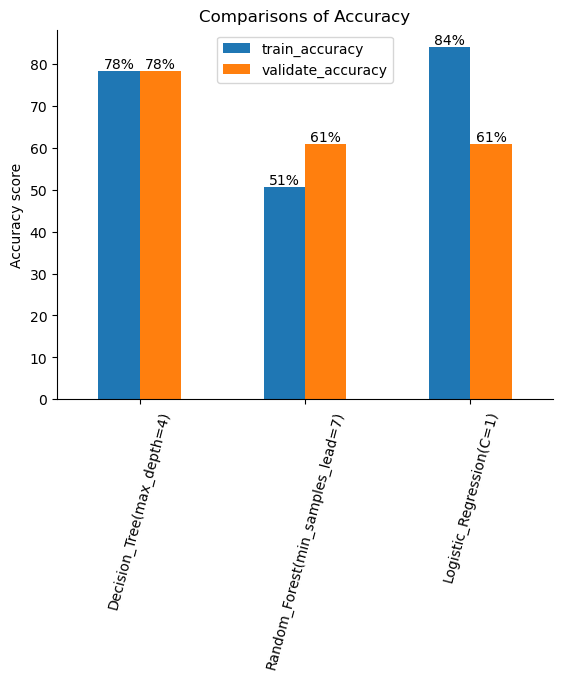

In [14]:
models_df = m.get_models_accuracy(X_train_tfid, X_val_tfid, y_train, y_val)
m.viz_models_accuracy(models_df)

In [15]:
#run best model on test set
m.get_decison_tree_test(X_train_tfid, X_test_tfid, y_train, y_test,4)

0.75


# Conclusion